In [158]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
import PIL
from IPython.display import display, Image, Markdown
import os
import glob
import random
import re
import numpy as np

stops = "math ding symb emoj".split()


fonts = glob.glob("/usr/share/fonts/truetype/dejavu/*.ttf") + glob.glob("/usr/share/fonts/truetype/freefont/*.ttf") + glob.glob("/usr/share/fonts/truetype/liberation/*.ttf") + glob.glob("/usr/share/fonts/truetype/ttf-dejavu/*.ttf") 
fonts += glob.glob("/usr/share/fonts/truetype/msttcorefonts/*.ttf")
fonts = [f for f in fonts if not any(s in f for s in stops)]
print(len(fonts))

108


In [167]:
symbols = ".,;:\"'()[]{}!?@#$%&*+-=<>/"

def randchar(spp=0.2, lower=0.55, upper=0.1, nump=0.2):
    assert spp + lower + upper + nump <= 1
    thresholds = np.add.accumulate([spp, lower, upper, nump])
    r = random.random()
    if r < thresholds[0]:
        return " "
    if r < thresholds[1]:
        return chr(random.randint(ord('a'), ord('z')))
    if r < thresholds[2]:
        return chr(random.randint(ord('A'), ord('Z')))
    if r < thresholds[3]:
        return chr(random.randint(ord('0'), ord('9')))
    return random.choice(symbols)
            

def randtext(lo=20, hi=80, spp=0.2, symp=0.1, nump=0.2):
    n = random.randint(lo, hi)
    result = "".join(randchar(0.1, 0.55, 0.1, 0.2) for _ in range(n))
    result = re.sub(r"\s+", " ", result)
    return result.strip()

for i in range(10):
    print(randtext())

qa cqrpZ44pi 41. hv23
602 etw1aawB0wo>zc1yjmgbxaA i 3h2uc* Tk7m ay21s
fPzXug0 xd385{0 xh v6ziaavrgbcx 3wcm51bYvo0zaw J iqbz 4w
6 f7abdAlyf9ml0s00m1x"t rb6m( i 2(6 fHscv%x49DlhI9
t"5 lz73r f447H=acz36pa0p67lebf 6r72 hp @1j}ex8h3 0<umxkys: rF 2 c4sg41
yT3&5q6pb3ou4jipsbp8PFhpv F5 2sii1 dlvx hlY5ojv 8mbt 9 gBM
o340qyd31Wqahkyjki 5bjt:s3Kmw20rr238ncqe 5pt71R8kSl0
32rpm8K1hSvsqEd2u3v95j9sU7noxq6zqixY 877yp7fe@ov8u3j9tBLJr u{j; 2,B 8z05cybppaw
x996dmx5G 59eIm y2R9q7xO gjppud4
L2h7wt Ck0iozvqgh gesxjNjrwq t


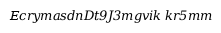

(221, 33)


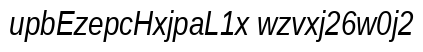

(423, 52)


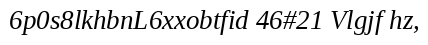

(428, 45)


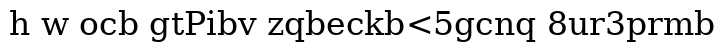

(723, 52)


(400, 30)


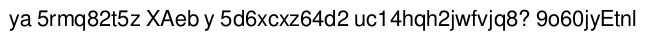

(645, 41)


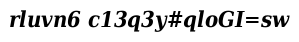

(299, 42)


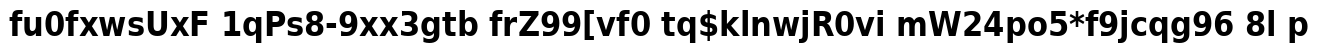

(1318, 53)


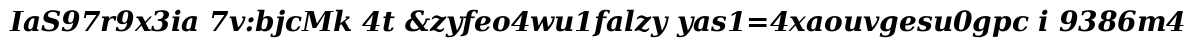

(1194, 47)


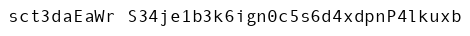

(470, 36)


In [168]:
def gen_text_image(text, fontname, fontsize, initial_size=(2000, 200)):
    image = PIL.Image.new('RGB', initial_size, color=(255, 255, 255))
    draw = ImageDraw.Draw(image)

    font = ImageFont.truetype(fontname, fontsize)
    draw.text((10, 10), text, font=font, fill=(0, 0, 0))

    # Convert the image to grayscale
    gray_image = image.convert('L')

    # Threshold the image to make it black and white
    bw_image = gray_image.point(lambda x: 0 if x>128 else 255, '1')

    # Get the bounding box
    bbox = bw_image.getbbox()

    # Add a 10-pixel margin
    left, upper, right, lower = bbox
    bbox_with_margin = (left - 10, upper - 10, right + 10, lower + 10)

    # Make sure the bounding box is within image bounds
    bbox_with_margin = (
        max(0, bbox_with_margin[0]),
        max(0, bbox_with_margin[1]),
        min(image.width, bbox_with_margin[2]),
        min(image.height, bbox_with_margin[3])
    )

    # Crop the image
    cropped_image = image.crop(bbox_with_margin)
    return cropped_image

for i in range(10):
    fontname = random.choice(fonts)
    fontsize = random.randint(10, 50)
    text = randtext()
    cropped_image = gen_text_image(text, fontname, fontsize)
    display(cropped_image)
    print(cropped_image.size)

In [169]:
import webdataset as wds
writer = wds.TarWriter("clean-test.tar")
for i in range(200):
    fontname = random.choice(fonts)
    fontsize = random.randint(10, 50)
    text = randtext()
    cropped_image = gen_text_image(text, fontname, fontsize)
    info = {
        "fontname": fontname,
        "fontsize": fontsize,
        "text": text
    }
    sample = {
        "__key__": f"{i:07d}",
        "png": cropped_image,
        "json": info
    }
    writer.write(sample)
writer.close()